In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [9]:
movies = pd.read_csv("fandango_score_comparison.csv")

In [10]:
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


## Histograms

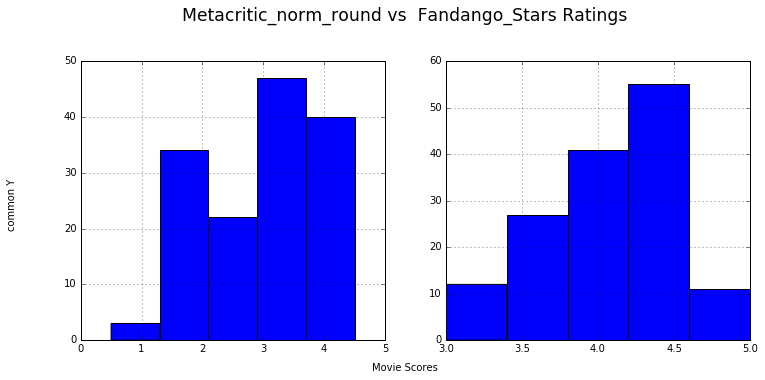

In [72]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xlim(0,5.0)
ax2.set_xlim(3,5.0)

movies["Metacritic_norm_round"].hist(bins=5, ax=ax1)
movies["Fandango_Stars"].hist(bins=5, ax=ax2)

plt.suptitle('Metacritic_norm_round vs  Fandango_Stars Ratings', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Movie Scores', ha='center')
fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
plt.show()

Fandago Stars ratings are skewed to the right (negative skew) meaning they gravited towards a higher rating. Metric_norm is slighly negaitivly skewed, but it's far more normal. 

The most frequent rating on Fandango is over 4.  The most frequent rating on Metacritic is between 3 and 3.5.

## Mean, median, and standard deviation

In [79]:
def print_mmd(column):
    print("Mean, median, std for {}:".format(column))
    print(np.mean(movies[column]))
    print(np.median(movies[column]))
    print(np.std(movies[column]))

In [80]:
print_mmd('Metacritic_norm_round')

Mean, median, std for Metacritic_norm_round:
2.97260273973
3.0
0.987561029704


In [81]:
print_mmd('Fandango_Stars')

Mean, median, std for Fandango_Stars:
4.08904109589
4.0
0.53853216127


The values confirm what we saw in the histogram. Fandango rates movies higher on average, and most ratings are closer together. It appears that Fandango makes money selling movie tickets, which may incentivise them to rate movies higher.

## Scatter plots

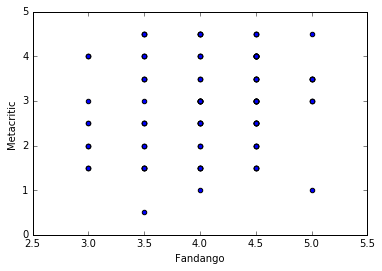

In [120]:
fig, ax = plt.subplots()
ax.scatter(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
ax.set_xlabel('Fandango')
ax.set_ylabel('Metacritic')
plt.show()

Doesn't look like there is any correlation between the two sites. This is odd, because you would expcted fair movie reviews to be similar accross multiple sites. 

Let's calculate the difference in movie ratings between the two sites and print out the movies with the biggest descrpency.

In [125]:
movies['fm_diff'] = movies['Metacritic_norm_round'] - movies['Fandango_Stars']

In [126]:
movies['fm_diff'] = abs(movies['fm_diff'])

In [127]:
# 5 movies with biggest difference in ratings between the two sites
movies = movies.sort_values('fm_diff', ascending=False)
movies['FILM'].iloc[0:5]

3             Do You Believe? (2015)
19                     Pixels (2015)
134          The Longest Ride (2015)
133    Paul Blart: Mall Cop 2 (2015)
35                   The Loft (2015)
Name: FILM, dtype: object

## Correlations

In [130]:
r, p_value = stats.pearsonr(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
print(r)

0.178449190739


An R value of 1 is perfect correlation, and 0 is no correlation. Our result of .18 is low. This means there is not much correlation between the two data sets. This means that you can't rely on the reviews of one site. It would be interesting if we knew how they correlated to other websites to figure out which one is more accurate.

In [142]:
x = movies["Metacritic_norm_round"]
y = movies["Fandango_Stars"]

m, b, r_value, p_value, stderr_slope = stats.linregress(x, y)
print(r_value)
print(p_value)

0.178449190739
0.0311615162285


In [143]:
# Prediect fandango score given metacritic score 3
def calc_prediction(x):
    return x * m + b
calc_prediction(3)

4.0917071528212041

In [144]:
# Prediect fandango score given metacritic score 1
calc_prediction(1)

3.897084996873347

In [145]:
# Prediect fandango score given metacritic score 5
calc_prediction(5)

4.2863293087690604

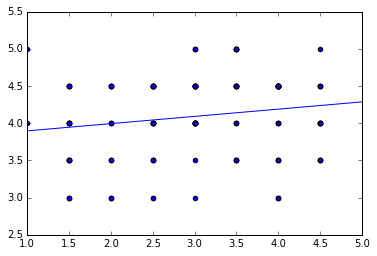

In [153]:
x = [1.0, 5.0]
y = [calc_prediction(1), calc_prediction(5)]
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot(x,y)
plt.xlim(1,5)
plt.show()

## Next steps

Here are some potential next steps:

Explore the other rating services, IMDB and RottenTomatoes.
See how they differ from each other.
See how they differ from Fandango.
See how user scores differ from critic scores.
Acquire more recent review data, and see if the pattern of Fandango inflating reviews persists.
Dig more into why certain movies had their scores inflated more than others.